In [1]:
# Imports

import numpy as np
from sklearn.metrics import f1_score, average_precision_score
import math
import requests
import os

import datetime
from datetimerange import DateTimeRange
from datetime import timedelta  
from dateutil import parser
from urllib import *
import json

from sklearn.cluster import KMeans

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import string

from collections import Counter
from tqdm import tqdm_notebook 
tqdm_notebook().pandas()
from tqdm import tqdm_notebook as tqdm

import requests
import urllib

import re
import glob
import time 

import itertools
import pathlib

from typing import Union
import pickle

import glob


# Greedy IDE completion 
%config IPCompleter.greedy=True

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; } </style>"))
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os


def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)


def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [5]:
from collections import Counter

search_texts = df['SearchText_norm'].tolist()
search_texts = [x for y in search_texts for x in y if not x.isdigit()]

Counter(search_texts)

Counter({'nj': 28342,
         'artikel': 11577,
         'recht': 3124,
         'jor': 8293,
         'hr': 7878,
         'bw': 13276,
         'rv': 4112,
         'strafrecht': 975,
         'art': 8805,
         'jar': 4822,
         'verjaring': 1686,
         'wet': 4692,
         'lid': 6381,
         'ondernemingsraad': 686,
         'auteursrecht': 643,
         'een': 4159,
         'faillissement': 1882,
         'fw': 1207,
         '843a': 773,
         'evrm': 955,
         'avg': 1380,
         'maart': 1651,
         'ehrm': 748,
         'hoge': 2254,
         'raad': 2947,
         'commentaar': 1020,
         'beroep': 1631,
         'ondernemingsrecht': 1573,
         'awb': 1997,
         'mei': 1318,
         'december': 1556,
         'eurocommerce': 50,
         'bestuurder': 1684,
         'f': 166,
         'bibob': 314,
         'wob': 788,
         'februari': 1594,
         'oktober': 1418,
         'ab': 3237,
         'boek': 507,
         'vof': 363,
 

In [7]:
df_common = pd.DataFrame({'SearchText' : search_texts})
df

,UserID,DocumentIDs,DocumentPositions,DocumentURLs,EventID,ID,SearchTypeID,ShortTimeStamp,SearchText,SearchText_norm,idf_query_score,query_length,score_based_2_split,score_based_3_split,score_based_5_split,score_based_7_split,score_based_10_split,score_based_15_split,score_based_18_split,even_size_bins_2,even_size_bins_3,even_size_bins_5,even_size_bins_7,even_size_bins_10,even_size_bins_15
7193,11028,"[32295235, 31998893]","[1, 11]",[https://www.navigator.nl/#/document/id4aee20c...,27,a9e0d162-42f1-4785-9d8c-3daef31915da,14,20190809,NJ,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0
20091,24639,32246565,[6],https://www.navigator.nl/#/document/id292e754a...,27,ad64390a-887a-4c43-82e3-30be17118109,14,20190722,nj,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19971,24639,32133620,[12],https://www.navigator.nl/#/document/id2462c20d...,27,508e1b9b-2bf9-4dd3-aa0a-a989a841d9b9,14,20190702,nj,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0
288240,201539,32159295,[1],https://www.navigator.nl/#/document/id97153aa3...,27,507044b9-1efc-481c-a0c4-82a4b6e1dbf2,14,20190628,NJ,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0
288242,201539,32159295,[1],https://www.navigator.nl/#/document/id97153aa3...,27,a136c29e-2387-4acc-beba-6b40a6189c9e,14,20190701,NJ,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0
20074,24639,"[32246569, 32246565, 32246565]","[4, 6, 6]",[https://www.navigator.nl/#/document/idf06cd19...,27,438cdbe8-2252-4e8f-bace-4bb53c7b843f,14,20190718,nj,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0
295418,206183,32042319,[1],https://www.navigator.nl/#/document/id68265838...,27,eaa9e23d-2bee-4907-b70e-feac925bf7f8,14,20190601,NJ,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0
397532,233695,31737661,[7],https://www.navigator.nl/#/document/ida06a6720...,27,a6526ebd-7fce-4a62-9250-9e7974f55098,14,20190821,NJ,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10270,13426,"[32084878, 32084878]","[1, 1]",[https://www.navigator.nl/#/document/ide0621f9...,27,3212d70f-22d0-4ef1-b3e4-56db56aee911,14,20190613,nj,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0
356191,226258,"[32119208, 32229897]","[50, 7]",[https://www.navigator.nl/#/document/idd588353...,27,63e02115-75f6-47eb-9ee9-3e684dfe9870,14,20190717,nj,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
most = df_common['SearchText'].value_counts()
most

nj                     28342
bw                     13276
artikel                11577
art                     8805
jor                     8293
                       ...  
eclinlghshe20141355        1
vaderlijk                  1
525o                       1
acf                        1
eclinlhr2002ad9856         1
Name: SearchText, Length: 96227, dtype: int64

In [9]:

df_common.groupby(['SearchText']).size().sort_values(ascending=False).transform(lambda x: x/x.sum()).reset_index(name='count')
    

,SearchText,count
0,nj,2.747092e-02
1,bw,1.286797e-02
2,artikel,1.122119e-02
3,art,8.534383e-03
4,jor,8.038119e-03
5,hr,7.635874e-03
6,lid,6.184884e-03
7,jar,4.673799e-03
8,wet,4.547794e-03
9,een,4.031175e-03


In [10]:
print(os.listdir('./data/'))
stopwords = np.loadtxt('./data/stopwords_nl.txt', dtype=str)

['idf_dict.pkl', 'click_through_rate_rank15.jpeg', 'df_27', 'stopwords_nl.txt', 'click_through_rate_rank50.jpeg', 'AOL_search_data_leak_2006.zip', 'data.txt', 'AOL-user-ct-collection', '.~lock.search_text_6_10.xlsx#', 'solr_dump.txt', 'click_through_rate_rank10.jpeg', 'search_text_6_10.xlsx', 'df_agg', 'titles.txt', 'click_through_rate_rank5.jpeg', 'solr', 'df_27_aggregated', 'df_27_snipp_and_date']


In [17]:
def get_aol_df():
    """
    """
    
    owd = os.getcwd()

    os.chdir('/home/winston/PycharmProjects/LegalInteligenceTFIDF/')
    print(os.getcwd())
    
    def delete_faulty_rows(aol_df: pd.DataFrame) -> pd.DataFrame:

        doc_pos = aol_df['ItemRank'].tolist()
        doc_pos_ints = []
        faulty_ids = []
        for idx, pos in enumerate(doc_pos):
            try:
                doc_pos_ints.append(int(pos))
            except:
                faulty_ids.append(idx)

        aol_df.drop(aol_df.index[faulty_ids], inplace=True)

        return aol_df
    
    os.chdir('/home/winston/PycharmProjects/LegalInteligenceTFIDF/')
    print(os.getcwd())
    
    
    stopwords = np.loadtxt('./data/stopwords_en.txt', dtype=str)

    text_files_aol = glob.glob('./data/AOL-user-ct-collection/*.txt')
    all_dataframes = []

    new_dirs =  []
    for dirs in text_files_aol:
        df_AOL = pd.read_csv(text_files_aol[0],  sep='\t', names=['AnonID', 'Query', 'QueryTime', 'ItemRank', 'ClickURL'])
        df_AOL.dropna(inplace=True)
        df_AOL.to_hdf(path_or_buf=dirs[:-7], key='df')
        new_dirs.append(dirs[:-7])
    
    
    all_dataframes = []
    for dirs in new_dirs:
        all_dataframes.append(pd.read_hdf(dirs))

    aol_df = pd.concat(all_dataframes)
    
    print(aol_df.shape)
    
    
#     aol_df = aol_df[:5000000]
#     aol_df = aol_df[5000000:10000000]
#     aol_df = aol_df[15000000:]

    
    aol_df.drop(['ClickURL'], axis=1, inplace=True)
    
    print(aol_df.shape)

    aol_df = delete_faulty_rows(aol_df)
    
    os.chdir(owd)
    print(os.getcwd())

    aol_df.rename(columns={'AnonID': 'UserID', 'Query': 'SearchText', 'ItemRank': 'DocumentPositions','QueryTime': 'TimeStamp'}, inplace=True)
    
    aol_df['DocumentPositions'] = aol_df['DocumentPositions'].progress_apply(lambda x: int(x))
    
    aol_df['DocumentPositions'] = aol_df['DocumentPositions'].apply(pd.to_numeric,downcast='unsigned')

    
    aol_df['SearchText_norm'] = aol_df['SearchText'].apply(
        lambda query: query.translate(str.maketrans('', '', string.punctuation)))

    aol_df['SearchText_norm'] = aol_df['SearchText_norm'].apply(lambda x: [query.lower() for query in x.split()])

    aol_df['SearchText_norm'] = aol_df['SearchText_norm'].apply(
        lambda query: [word for word in query if word not in stopwords])

    aol_df['query_length'] = aol_df['SearchText_norm'].progress_apply(lambda x: len(x))

    aol_df['ShortTimeStamp'] = aol_df['TimeStamp'].progress_apply(lambda x: x[0:4] + x[5:7] + x[8:10])
    aol_df['TimeStamp']      = aol_df['TimeStamp'].progress_apply(lambda x: parser.parse(str(x), fuzzy_with_tokens=False))
    
    
    print(aol_df.shape)
    aol_df = aol_df[aol_df['SearchText_norm'].map(lambda d: len(d)) > 0]
    print(aol_df.shape)
    
    
    aol_df.to_hdf(path_or_buf='./data/aol_df_15-20million', key='df')
        
    return aol_df


aol_df = get_aol_df()


/home/winston/PycharmProjects/LegalInteligenceTFIDF
/home/winston/PycharmProjects/LegalInteligenceTFIDF


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2856: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2530: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->['AnonID', 'Query', 'QueryTime', 'ItemRank', 'ClickURL']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


(19427180, 5)
(4427180, 4)
/home/winston/LegalIntelligence


HBox(children=(IntProgress(value=0, max=4427178), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4427178), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4427178), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4427178), HTML(value='')))


(4427178, 7)
(4352514, 7)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2530: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->['UserID', 'SearchText', 'SearchText_norm', 'ShortTimeStamp']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


[0.53543375 0.24185489 0.16608402 0.12323407 0.09725939 0.07925478
 0.06679854 0.05515513 0.04773174 0.04137774 0.03605716 0.03253009
 0.02873927 0.02627679 0.02372321 0.02154846 0.01979811 0.01809812
 0.01688966 0.01643888 0.0128135  0.01156428 0.0105956  0.01008008
 0.00943749 0.00835371 0.00802043 0.0073131  0.00693905]


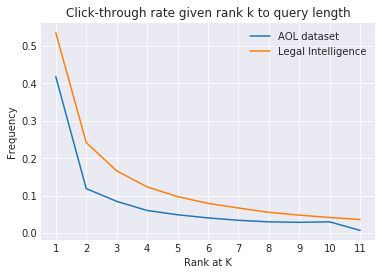

In [26]:
def get_unique_aol():
    
    all_aol = ['aol_df_5million', 'aol_df_5-10million', 'aol_df_10-15million', 'aol_df_15-20million']

    all_frames = []
    for df_name in all_aol: 
    #     print(df_name)
        df = load_obj(name=df_name) 
        all_frames.append(df)

    df_aol_full = pd.concat(all_frames)

    
    # Al unique 30-minute user sessions
    total_unique_user_search_time = len(df_aol_full[['UserID','SearchText','ShortTimeStamp']].drop_duplicates())
    
    # All unique sessions
    total_unique_sessions = len(df_aol_full.unique_ses_id.unique())
    
    # All click events
    total = len(df_aol_full)
    
    return total


def get_ctr(df):
    """
    :param df:
    :return:
    """
    counter = Counter(itertools.chain.from_iterable(df_legal.DocumentPositions.tolist()))

    ctr = []
    for i in range(1,30):
        ctr.append(counter[i])

    # Sum element per index
    ctr = [(i)/len(df) for i in ctr]

    return np.array(ctr)

def get_ctr_aol(doc_pos):
    """
    :param df:
    :return:
    """
    
    counter = Counter(doc_pos)

    ctr = []
    for i in range(1,30):
        ctr.append(counter[i])

    # Sum element per index
    ctr = [(i)/len(doc_pos) for i in ctr]

    return np.array(ctr)

def plot_ctr_general(df: pd.DataFrame, plot_to_rank: int, aol: bool) -> plt.plot:
    """
    Plot ctr length
    :plot_to_rank: integer to where to plot
    :param df:
    """
    
    if aol:
        ctr = get_ctr_aol(df)
        plt.plot(np.arange(1,len(ctr[:plot_to_rank])+1),ctr[:plot_to_rank], label='AOL dataset')
    else:        
        ctr = get_ctr(df)
        print(ctr)
        plt.plot(np.arange(1,len(ctr[:plot_to_rank])+1), ctr[:plot_to_rank], label='Legal Intelligence')

    plt.xlabel('Rank at K')
    plt.ylabel('Frequency')
    # Plot from 1 to rank+1 
    plt.xticks(np.arange(1, plot_to_rank+1, step=1))
    plt.legend()
    plt.title("Click-through rate given rank k to query length")
    
    return plt.plot

    
df_legal = pd.read_hdf(path_or_buf='./data/df_27_snipp_and_date', key='df',low_memory=False)
df_pos_list = load_obj(name='aol_all_pos')


aol_plot = plot_ctr_general(df_pos_list, plot_to_rank=11,aol=True)
legal_plot = plot_ctr_general(df_legal, plot_to_rank=11,aol=False)
plt.savefig('frequency_position.svg', format='svg', dpi=1200)

plt.show()


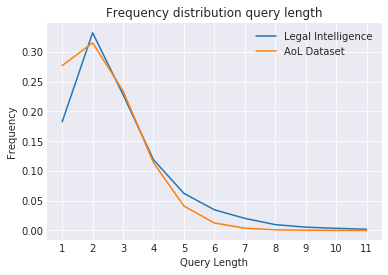

In [4]:
def plot_query_length(df: pd.DataFrame, plot_to_rank: int, aol: bool):
    """
    :param df:
    :return:
    """

    if aol:
        counter = Counter(df)
        
    else:
        df = df[df['query_length'].isin([1,2,3,4,5,6,7,8,9,10,11])]
        counter = Counter(df['query_length'].tolist())
    
    total = len(df)

    frequency = []
    for i in range(1, plot_to_rank+1):
        frequency.append(counter[i] / total)    
    
    if aol:
        plt.plot(np.arange(1,len(frequency)+1), frequency, label='AoL Dataset')
    else:
        plt.plot(np.arange(1,len(frequency)+1), frequency, label='Legal Intelligence')

    plt.xlabel('Query Length')
    plt.ylabel('Frequency')
    # Plot from 1 to rank+1 
    plt.xticks(np.arange(1, len(frequency)+1, step=1))
    plt.legend()
    plt.savefig('myimage.svg', format='svg', dpi=1200)

    plt.title("Frequency distribution query length")
    return plt.plot



aol_all_searchtext = load_obj(name='query_length')
df_legal = pd.read_hdf(path_or_buf='./data/df_27_snipp_and_date', key='df',low_memory=False)

plot_1 = plot_query_length(df_legal, 11, aol=False)
plot_2 = plot_query_length(aol_all_searchtext, 11, aol=True)

plt.show()

In [2]:
all_aol = ['aol_df_5million', 'aol_df_5-10million', 'aol_df_10-15million', 'aol_df_15-20million']

all_frames = []
for df_name in all_aol: 
#     print(df_name)
    df = load_obj(name=df_name) 
    all_frames.append(df)

df_aol_full = pd.concat(all_frames)

# len(df_aol_full)

# total = len(df_aol_full[['UserID','SearchText','ShortTimeStamp']].drop_duplicates())
# total

# df_aol_full

In [10]:


df_aol_full
# save_obj(df_aol_full['SearchText_norm'].tolist(), 'aol_all_searchtext_norm')
save_obj(df_aol_full['query_length'].tolist(), 'query_length')

# save_obj(df_aol_all['DocumentPositions'].tolist(), 'aol_all_pos')
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

,UserID,SearchText,TimeStamp,DocumentPositions,SearchText_norm,query_length,ShortTimeStamp,SessionID,unique_ses_id
131073,384245,how does aspirin affect platelets,2006-05-06 13:12:06,3,"[aspirin, affect, platelets]",3,20060506,1,384245200605061
131075,384245,how does nsaids affect platelets,2006-05-06 13:14:41,2,"[nsaids, affect, platelets]",3,20060506,1,384245200605061
131076,384245,how does nsaids affect platelets,2006-05-06 13:14:41,3,"[nsaids, affect, platelets]",3,20060506,1,384245200605061
131077,384245,how does nsaids affect platelets,2006-05-06 13:14:41,5,"[nsaids, affect, platelets]",3,20060506,1,384245200605061
131078,384245,how does nsaids affect platelets,2006-05-06 13:14:41,4,"[nsaids, affect, platelets]",3,20060506,1,384245200605061
...,...,...,...,...,...,...,...,...,...
32078,99848,physical and chemical changes,2006-05-07 11:47:21,1,"[physical, chemical]",2,20060507,1,99848200605071
32079,99848,physical and chemical changes,2006-05-07 11:47:21,4,"[physical, chemical]",2,20060507,1,99848200605071
32080,99848,physical and chemical changes,2006-05-07 11:47:21,4,"[physical, chemical]",2,20060507,1,99848200605071
32081,99848,physical and chemical changes,2006-05-07 11:49:25,6,"[physical, chemical]",2,20060507,1,99848200605071


In [8]:
"""
- Make a day column in the Legal and Aol Dataset
- Start with every query + 30 minutes, then take next set of queries
- Define sessions
- Plot session length
- Average amount of queries per session
"""
# df_aol = pd.read_hdf(path_or_buf='./data/aol_df', key='df')
# df_legal = pd.read_hdf(path_or_buf='./data/df_27_snipp_and_date', key='df')
# Why does this work : https://stackoverflow.com/questions/50311201/creating-interaction-sessions-based-on-timestamps-in-pandas

def define_sessions(df: pd.DataFrame):
    """
    :param df: dataframe that contains a shorttimestamp 
    """
    all_session_ids = []
    for shape, df_group in tqdm(df.groupby(['UserID', 'ShortTimeStamp'])):
        session_ids = (df_group.TimeStamp-df_group.TimeStamp.shift(1) > pd.Timedelta(30, 'm')).cumsum()+1
        all_session_ids.extend(session_ids.tolist())

    df.sort_values(by=['UserID','ShortTimeStamp'], inplace=True)
    
    df['SessionID'] = all_session_ids
    df['unique_ses_id'] = df.progress_apply(lambda x: int(str(x['UserID']) + str(x['ShortTimeStamp']) + str(x['SessionID'])), axis=1)
    
    df['unique_ses_id'] = df['unique_ses_id'].apply(pd.to_numeric)
    
    return df


df_legal = pd.read_hdf(path_or_buf='./data/df_27_snipp_and_date', key='df',low_memory=False)
# df_legal = 
# df_legal = define_sessions(df_legal)


tm =  df_legal.iloc[0].TimeStamp
# all_aol = ['aol_df_5million', 'aol_df_5-10million', 'aol_df_10-15million', 'aol_df_15-20million']

# for df_name in all_aol: 
#     print(df_name)
#     df = pd.read_hdf(path_or_buf='./data/{}'.format(df_name), key='df', low_memory=False)    
#     df = define_sessions(df)
#     save_obj(obj=df, name=df_name) 
    
    


'\n- Make a day column in the Legal and Aol Dataset\n- Start with every query + 30 minutes, then take next set of queries\n- Define sessions\n- Plot session length\n- Average amount of queries per session\n'

HBox(children=(IntProgress(value=0, description='Looping through dataframe', max=1454575, style=ProgressStyle(description_width='initial')), HTML(value='')))

ValueError: x and y must have same first dimension, but have shapes (20,) and (21,)

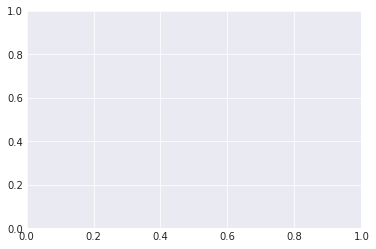

In [16]:
def find_length_session(df: pd.DataFrame, plot_to_length: int):
    """
    :param df: 
    """
    
    tot_unique_sessions = df['unique_ses_id'].nunique()
    lengths = []
    for shape, df_group in tqdm(df.groupby(['unique_ses_id']), desc='Looping through dataframe'):
        lengths.append(len(df_group))

    sorted_dict = list(sorted(list(Counter(lengths).items()), key=lambda x:x[0]))
    labels, values = zip(*sorted_dict)
    
    values_dummy = [(x/tot) for x in values]
    plt.plot(np.arange(1,plot_to_length+1), values_dummy[:(plot_to_length+1)])
    plt.xticks(np.arange(1, plot_to_length+1, step=1))
    plt.show()
    
    

find_length_session(df, plot_to_length=20)

In [4]:
def request_solr_id_timestamp(query_ids: list, idx: int):
    """
    :param idx: integer idx
    :param query_ids: list of solr ID
    """

    query_ids = 'ID:(' + ' '.join(query_ids) + ')'

    url = 'http://ec2-18-184-94-154.eu-central-1.compute.amazonaws.com:8080/solr' \
     '/ACC_Logging_Slave/select?indent=on&q=EventID:27 AND {}&rows=300&wt=json'.format(query_ids)
    
    try:
        response = requests.get(url)

        # Transform the request into a json
        response = response.json()
        response = response['response']['docs'][:]

        df =  pd.DataFrame(response)
        ids       = df['ID']
        time_stamp = df['TimeStamp']
      
    except:
        ids = "Exception"
        time_stamp = "Exception"

    
    df = pd.DataFrame({'ID'        : ids,
                       'TimeStamp' : time_stamp })
    df.to_hdf(path_or_buf='/home/winston/LegalIntelligence/data/timestamp/id_timestamp_id_{}'.format(idx), key='df')
  
    return 


df_legal = pd.read_hdf(path_or_buf='/home/winston/PycharmProjects/LegalInteligenceTFIDF/data/df_27_snipp_and_date', key='df')
id_list = df_legal['ID'].tolist()


list_size = 150
id_list_chunks = [id_list[x:x+list_size] for x in range(0, len(id_list), list_size)]

for idx, id_chunk in enumerate(tqdm(id_list_chunks, desc='Looping through legal IDs')):
        request_solr_id_timestamp(id_chunk, idx)
    




HBox(children=(IntProgress(value=0, description='Looping through legal IDs', max=2781, style=ProgressStyle(description_width='initial')), HTML(value='')))

In [44]:
timestamp_files = glob.glob('/home/winston/LegalIntelligence/data/timestamp/*')
df_legal = pd.read_hdf(path_or_buf='/home/winston/PycharmProjects/LegalInteligenceTFIDF/data/df_27_snipp_and_date', key='df')

all_dataframes =  []
for file in timestamp_files:
    dummy_frame =  pd.read_hdf(file, key='df')
    all_dataframes.append(dummy_frame)

df_join = pd.concat(all_dataframes)

# df_legal = df_legal.join(df,lsuffix='ID', rsuffix='ID')



In [45]:

df_legal['ID'] = df_legal['ID'].astype('str')
df_join['ID'] = df_join['ID'].astype('str')
df_legal
df_join


,UserID,DocumentIDs,DocumentPositions,DocumentURLs,EventID,ID,SearchTypeID,ShortTimeStamp,SearchText,SearchText_norm,idf_query_score,query_length,score_based_2_split,score_based_3_split,score_based_5_split,score_based_7_split,score_based_10_split,score_based_15_split,score_based_18_split,even_size_bins_2,even_size_bins_3,even_size_bins_5,even_size_bins_7,even_size_bins_10,even_size_bins_15,date_added,snippet_added,date_added_binary
7193,11028,"[32295235, 31998893]","[1, 11]",[https://www.navigator.nl/#/document/id4aee20c...,27,a9e0d162-42f1-4785-9d8c-3daef31915da,14,20190809,NJ,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"[20190715, 20190514]",[OM-cassatie. Op de voet van art. 94a Sv rust ...,"[1, 0]"
20091,24639,32246565,[6],https://www.navigator.nl/#/document/id292e754a...,27,ad64390a-887a-4c43-82e3-30be17118109,14,20190722,nj,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,[20190707],[IPR. Procesrecht. Internationale bevoegdheid ...,[1]
19971,24639,32133620,[12],https://www.navigator.nl/#/document/id2462c20d...,27,508e1b9b-2bf9-4dd3-aa0a-a989a841d9b9,14,20190702,nj,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,[20190617],[Verzoek om een prejudiciële beslissing kracht...,[1]
288240,201539,32159295,[1],https://www.navigator.nl/#/document/id97153aa3...,27,507044b9-1efc-481c-a0c4-82a4b6e1dbf2,14,20190628,NJ,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,[20190623],[Antilliaanse zaak. Passieve omkoping bij verk...,[1]
288242,201539,32159295,[1],https://www.navigator.nl/#/document/id97153aa3...,27,a136c29e-2387-4acc-beba-6b40a6189c9e,14,20190701,NJ,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,[20190623],[Antilliaanse zaak. Passieve omkoping bij verk...,[1]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181005,148275,1366464,[1],http://deeplink.rechtspraak.nl/uitspraak?id=EC...,27,078509c1-215a-46a8-8b78-b01d600dd18e,14,20190731,"NJ1983,796",[nj1983796],14.018768,1,1,2,4,6,9,14,17,1,2,4,6,9,14,[20070308],[Partijen -een werkgever en een werknemer- twi...,[0]
95617,90927,4957315,[1],https://www.navigator.nl/#/document/da5fd0b9df...,27,4ae4d70a-aee6-41fb-a4bc-111f9eb35219,14,20190726,AK5633,[ak5633],14.018768,1,1,2,4,6,9,14,17,1,2,4,6,9,14,[19940101],[Tot het begrip betrekking behoren ook de bete...,[0]
211076,163206,4687562,[1],http://deeplink.rechtspraak.nl/uitspraak?id=EC...,27,d1c7702f-2d4a-468f-87ed-51801cec91b2,14,20190724,ECLI:NL:RBSHE:2011:BQ4324,[eclinlrbshe2011bq4324],14.018768,1,1,2,4,6,9,14,17,1,2,4,6,9,14,[20110512],[Wilsovereenstemming Kamer van toezicht],[0]
8405,11685,"[32245087, 32245087]","[2, 2]",[http://deeplink.rechtspraak.nl/uitspraak?id=E...,27,9d726ac8-3fa4-4e23-ae19-aaa220731a04,14,20190723,ECLI:NL:GHDHA:2014:2987,[eclinlghdha20142987],14.018768,1,1,2,4,6,9,14,17,1,2,4,6,9,14,"[20190711, 20190711]",[Erfrecht. Omvang informatieplicht van een erf...,"[1, 1]"


,ID,TimeStamp
0,79ef997c-54a4-4f77-a782-9094bc553ec5,2019-07-12T10:28:56.270Z
1,6f7a62d6-b322-4d9e-a061-e965346b145a,2019-07-11T12:17:23.956Z
2,995933d0-63b9-412a-9231-0c292b2d0b17,2019-05-29T13:26:37.469Z
3,e5b9c769-5bc4-4fd8-a438-9bc3b82a344b,2019-06-06T12:45:08.120Z
4,4ac4d156-c682-409f-9d4d-1c9cebd0247a,2019-06-06T14:50:04.165Z
...,...,...
145,e64a5255-fb8b-40d9-8c39-ca8ac63bc622,2019-08-19T07:55:51.133Z
146,0e983876-bc7f-4156-a1f7-e3cffbac3aa0,2019-08-21T12:49:50.272Z
147,118efa7b-5b64-4145-819d-51b38a94555d,2019-08-22T15:05:15.099Z
148,4df8a014-6db2-4f43-a854-1a47f0be2fe3,2019-08-23T10:13:24.530Z


In [49]:
# dummy = df_legal.join(df_join,on='ID', lsuffix='_left', rsuffix='_right')
df = pd.merge(df_legal, df_join, on=['ID'])


In [51]:
df
df = df.to_hdf(path_or_buf='/home/winston/PycharmProjects/LegalInteligenceTFIDF/data/df_27_snipp_and_date', key='df')


,UserID,DocumentIDs,DocumentPositions,DocumentURLs,EventID,ID,SearchTypeID,ShortTimeStamp,SearchText,SearchText_norm,idf_query_score,query_length,score_based_2_split,score_based_3_split,score_based_5_split,score_based_7_split,score_based_10_split,score_based_15_split,score_based_18_split,even_size_bins_2,even_size_bins_3,even_size_bins_5,even_size_bins_7,even_size_bins_10,even_size_bins_15,date_added,snippet_added,date_added_binary,TimeStamp
0,11028,"[32295235, 31998893]","[1, 11]",[https://www.navigator.nl/#/document/id4aee20c...,27,a9e0d162-42f1-4785-9d8c-3daef31915da,14,20190809,NJ,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"[20190715, 20190514]",[OM-cassatie. Op de voet van art. 94a Sv rust ...,"[1, 0]",2019-08-09T11:03:49.929Z
1,24639,32246565,[6],https://www.navigator.nl/#/document/id292e754a...,27,ad64390a-887a-4c43-82e3-30be17118109,14,20190722,nj,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,[20190707],[IPR. Procesrecht. Internationale bevoegdheid ...,[1],2019-07-22T13:20:52.225Z
2,24639,32133620,[12],https://www.navigator.nl/#/document/id2462c20d...,27,508e1b9b-2bf9-4dd3-aa0a-a989a841d9b9,14,20190702,nj,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,[20190617],[Verzoek om een prejudiciële beslissing kracht...,[1],2019-07-02T12:40:47.364Z
3,201539,32159295,[1],https://www.navigator.nl/#/document/id97153aa3...,27,507044b9-1efc-481c-a0c4-82a4b6e1dbf2,14,20190628,NJ,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,[20190623],[Antilliaanse zaak. Passieve omkoping bij verk...,[1],2019-06-28T10:53:16.646Z
4,201539,32159295,[1],https://www.navigator.nl/#/document/id97153aa3...,27,a136c29e-2387-4acc-beba-6b40a6189c9e,14,20190701,NJ,[nj],3.766668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,[20190623],[Antilliaanse zaak. Passieve omkoping bij verk...,[1],2019-07-01T08:11:42.367Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417055,148275,1366464,[1],http://deeplink.rechtspraak.nl/uitspraak?id=EC...,27,078509c1-215a-46a8-8b78-b01d600dd18e,14,20190731,"NJ1983,796",[nj1983796],14.018768,1,1,2,4,6,9,14,17,1,2,4,6,9,14,[20070308],[Partijen -een werkgever en een werknemer- twi...,[0],2019-07-31T07:32:16.712Z
417056,90927,4957315,[1],https://www.navigator.nl/#/document/da5fd0b9df...,27,4ae4d70a-aee6-41fb-a4bc-111f9eb35219,14,20190726,AK5633,[ak5633],14.018768,1,1,2,4,6,9,14,17,1,2,4,6,9,14,[19940101],[Tot het begrip betrekking behoren ook de bete...,[0],2019-07-26T07:12:55.509Z
417057,163206,4687562,[1],http://deeplink.rechtspraak.nl/uitspraak?id=EC...,27,d1c7702f-2d4a-468f-87ed-51801cec91b2,14,20190724,ECLI:NL:RBSHE:2011:BQ4324,[eclinlrbshe2011bq4324],14.018768,1,1,2,4,6,9,14,17,1,2,4,6,9,14,[20110512],[Wilsovereenstemming Kamer van toezicht],[0],2019-07-24T08:07:16.553Z
417058,11685,"[32245087, 32245087]","[2, 2]",[http://deeplink.rechtspraak.nl/uitspraak?id=E...,27,9d726ac8-3fa4-4e23-ae19-aaa220731a04,14,20190723,ECLI:NL:GHDHA:2014:2987,[eclinlghdha20142987],14.018768,1,1,2,4,6,9,14,17,1,2,4,6,9,14,"[20190711, 20190711]",[Erfrecht. Omvang informatieplicht van een erf...,"[1, 1]",2019-07-23T12:11:52.141Z


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2531: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['DocumentIDs', 'DocumentPositions', 'DocumentURLs', 'ID', 'SearchText', 'SearchText_norm', 'date_added', 'snippet_added', 'date_added_binary', 'TimeStamp']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [57]:
 df_aol.to_hdf(path_or_buf='./data/aol_df', key='df')


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2531: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->['UserID', 'SearchText', 'ClickURL', 'SearchText_norm']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [22]:
df = pd.DataFrame({ 'A':  [1,2,3,4,1,2,3,5,10],
                    'B':  [1,2,3,5,1,2,3,4,11],
                    'C':  [1,2,3,5,1,2,3,5,12]})
df

,A,B,C
0,1,1,1
1,2,2,2
2,3,3,3
3,4,5,5
4,1,1,1
5,2,2,2
6,3,3,3
7,5,4,5
8,10,11,12


In [45]:
# df.groupby(by=['A','B']).apply(lambda x: x.drop_duplicates())
df[['A','B','C']].drop_duplicates()

TypeError: 'numpy.int64' object is not callable

In [41]:
a = [x for x in range(10,1)]
a

[]

In [48]:
sum_diag_two = sum([arr[i,j] for i,j in zip(range(0,len(arr)),reversed(range(0,len(arr))))])
sum_diag_two

55

In [49]:
abs(sum_diagonal- sum_diag_two)

9